In [4]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.utils import make_grid

import math
import random
import os

from PIL import Image, ImageOps, ImageEnhance
import numbers

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
train_path = os.path.join(os.getcwd(),'all/train.csv')
train_df   = pd.read_csv(train_path)

n_train    = len(train_df)
n_pixels   = len(train_df.columns) - 1
n_class    = len(set(train_df['label']))

print('# of training samples: {0}'.format(n_train))
print('# of training pixels: {0}'.format(n_pixels))
print('# of training classes: {0}'.format(n_class))

# of training samples: 42000
# of training pixels: 784
# of training classes: 10


In [10]:
test_path = os.path.join(os.getcwd(),'all/test.csv')
test_df   = pd.read_csv(test_path)

n_test    = len(test_df)
n_pixels  = len(test_df.columns)

print('# of test samples: {0}'.format(n_test))
print('# of test pixels: {0}'.format(n_test))

# of test samples: 28000
# of test pixels: 28000


5, 0, 1, 1, 8, 2, 4, 0


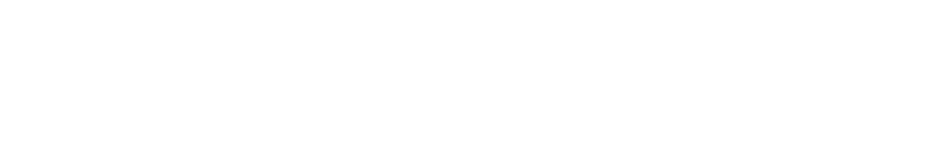

In [12]:
random_sel = np.random.randint(n_train, size=8)

grid       = make_grid(torch.Tensor((train_df.iloc[random_sel, 1:].as_matrix()/255.)\
                                   .reshape((-1,28,28))).unsqueeze(1), nrow=8)
plt.rcParams['figure.figsize'] = (16,2)
plt.axis('off')
print(*list(train_df.iloc[random_sel,0].values), sep=', ')